## Generating Scale-Free Networks

### Write a computer code to generate networks of size N with a power-law degree distribution with degree exponent γ. Refer to SECTION 4.9 for the procedure. 

#### Generate three networks with γ = 2.2 and with N = 103, N = 104 and N = 105 nodes, respectively. What is the percentage of multi-link and selfloops in each network? Generate more networks to plot this percentage in function of N. Do the same for networks with γ = 3.

In [1]:
import networkx as nx
from networkx import MultiGraph
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# generate degree sequence for network of size N with a power-law degree distribution with degree exponent gamma
def generate_degree_sequence(gamma: float, N: int) -> np.ndarray:
    degree_sequence = np.random.zipf(gamma, N)
    # sum of degrees must be even
    if sum(degree_sequence) % 2 != 0:
       degree_sequence[np.random.randint(0, N)] += 1
    return degree_sequence

# create a network from the degree sequence
def generate_network(gamma: float, N: int) -> MultiGraph:
    degree_sequence = generate_degree_sequence(gamma, N)
    G = nx.configuration_model(degree_sequence)
    return G

# calculate the number of multilinks in the network
def find_num_multilinks(G: MultiGraph) -> int:
    num_multilinks = 0
    edge_freq = {}
    for u, v in G.edges():
        if (u, v) in edge_freq:
            edge_freq[(u, v)] += 1
        else:
            edge_freq[(u, v)] = 1
    for freq in edge_freq.values():
        if freq > 1:
            num_multilinks += freq - 1
    return num_multilinks

# calculate the percentage of multilink and selfloops in each network
def selfloops_and_multilinks_percentage(gamma: float, N: int) -> float:
    G = generate_network(gamma, N)
    num_multilinks = find_num_multilinks(G)
    num_selfloops = nx.number_of_selfloops(G)
    total_edges = G.number_of_edges()
    percentage_multilinks_and_selfloops = ((num_multilinks + num_selfloops) / total_edges) * 100
    return percentage_multilinks_and_selfloops

# format print statement
def format_percentages(gamma: float, N: int) -> str:
    percentage_multilinks_and_selfloops = selfloops_and_multilinks_percentage(gamma, N)
    return f"This is a network with γ = {gamma} and N = {N}. The percentage of multi-links and selfloops is {percentage_multilinks_and_selfloops:.3f}%."

# plot percentage of multilink and selfloops in each network vs the size of the network
def plot_percentages(gamma: float) -> None:
    list_N = []
    list_percent = []
    for N in range(1, 5001):
        list_N.append(N)
        list_percent.append(selfloops_and_multilinks_percentage(gamma, N))

    plt.figure(figsize=(12, 6))
    plt.scatter(list_N, list_percent) 
    plt.title(f'Percentage of Multilinks and Selfloops in Networks of Varying Sizes with γ ={gamma}')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Percentage of Multilinks and Selfloops')
    plt.xticks(rotation=45)
    plt.show()

In [3]:
gamma = 2.2
for N in range(103, 106):
    print(format_percentages(gamma, N))

This is a network with γ = 2.2 and N = 103. The percentage of multi-links and selfloops is 95.028%.
This is a network with γ = 2.2 and N = 104. The percentage of multi-links and selfloops is 5.785%.
This is a network with γ = 2.2 and N = 105. The percentage of multi-links and selfloops is 17.518%.


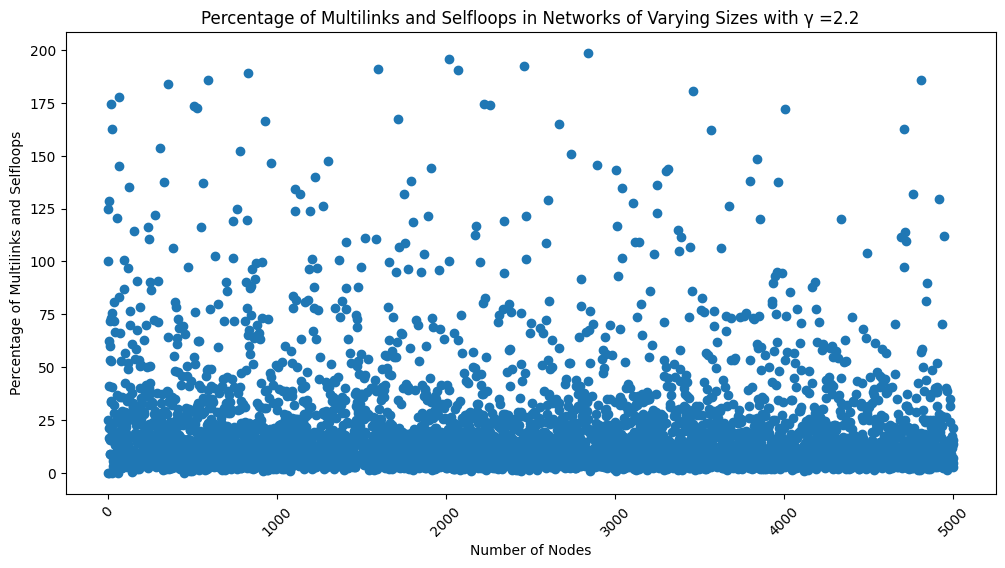

In [4]:
plot_percentages(2.2)

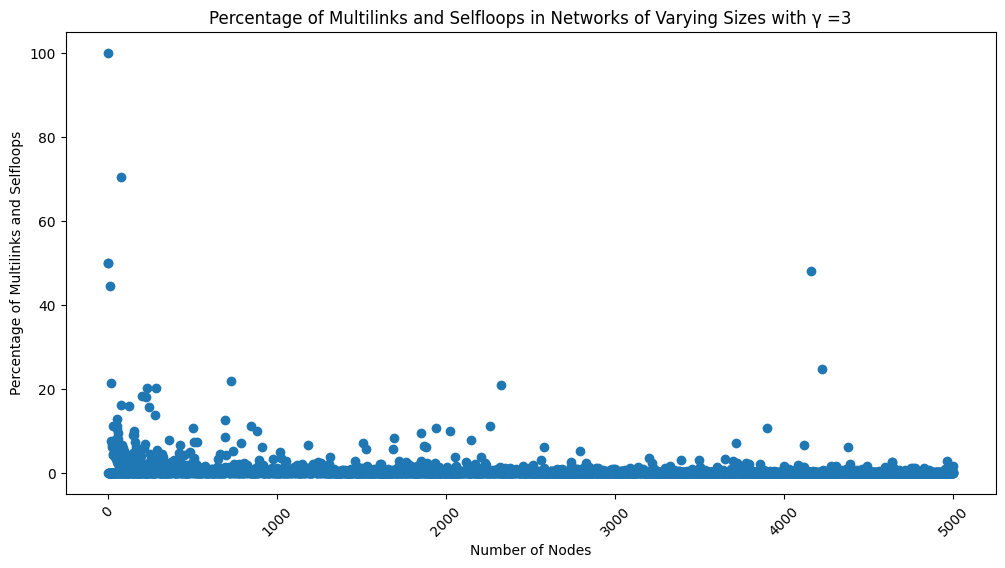

In [5]:
plot_percentages(3)